**BU DOSYA GROUPBY, FİLTER, GÖRSELLEŞTİRME, WHERE GİBİ KOMUTLARI İÇERİR**

dataset linki: https://www.kaggle.com/datasets/maso0dahmed/football-players-data

In [3]:
import numpy as np
import pandas as pd


In [4]:
df = pd.read_csv('data/fifa_players.csv')

In [7]:
df.head(10)

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,...,94,48,22,94,94,75,96,33,28,26
1,C. Eriksen,Christian Dannemann Eriksen,2/14/1992,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,...,89,46,56,84,91,67,88,59,57,22
2,P. Pogba,Paul Pogba,3/15/1993,25,190.50,83.9,"CM,CAM",France,88,91,...,82,78,64,82,88,82,87,63,67,67
3,L. Insigne,Lorenzo Insigne,6/4/1991,27,162.56,59.0,"LW,ST",Italy,88,88,...,84,34,26,83,87,61,83,51,24,22
4,K. Koulibaly,Kalidou Koulibaly,6/20/1991,27,187.96,88.9,CB,Senegal,88,91,...,15,87,88,24,49,33,80,91,88,87
5,V. van Dijk,Virgil van Dijk,7/8/1991,27,193.04,92.1,CB,Netherlands,88,90,...,64,82,88,41,60,62,87,90,89,84
6,K. Mbappé,Kylian Mbappé,12/20/1998,20,152.40,73.0,"RW,ST,RM",France,88,95,...,78,62,38,88,82,70,86,34,34,32
7,S. Agüero,Sergio Leonel Agüero del Castillo,6/2/1988,30,172.72,69.9,ST,Argentina,89,89,...,83,65,24,92,83,83,90,30,20,12
8,M. Neuer,Manuel Neuer,3/27/1986,32,193.04,92.1,GK,Germany,89,89,...,16,29,30,12,70,47,70,17,10,11
9,E. Cavani,Edinson Roberto Cavani Gómez,2/14/1987,32,185.42,77.1,ST,Uruguay,89,89,...,79,84,48,93,77,85,82,52,45,39


In [8]:
##missing value
missing_values = df.isnull().sum()

missing_values


 ###maas bilgileri bos olanlar atılacak

name                                 0
full_name                            0
birth_date                           0
age                                  0
height_cm                            0
weight_kgs                           0
positions                            0
nationality                          0
overall_rating                       0
potential                            0
value_euro                         255
wage_euro                          246
preferred_foot                       0
international_reputation(1-5)        0
weak_foot(1-5)                       0
skill_moves(1-5)                     0
body_type                            0
release_clause_euro               1837
national_team                    17097
national_rating                  17097
national_team_position           17097
national_jersey_number           17097
crossing                             0
finishing                            0
heading_accuracy                     0
short_passing            

In [9]:
df = df.dropna(subset=['value_euro', 'wage_euro'])

In [10]:
missing_values = df.isnull().sum()

missing_values

name                                 0
full_name                            0
birth_date                           0
age                                  0
height_cm                            0
weight_kgs                           0
positions                            0
nationality                          0
overall_rating                       0
potential                            0
value_euro                           0
wage_euro                            0
preferred_foot                       0
international_reputation(1-5)        0
weak_foot(1-5)                       0
skill_moves(1-5)                     0
body_type                            0
release_clause_euro               1582
national_team                    16842
national_rating                  16842
national_team_position           16842
national_jersey_number           16842
crossing                             0
finishing                            0
heading_accuracy                     0
short_passing            

In [19]:
###oyunların vksi hesapla ve yeni sütuna yaz
df["vki"] = df['weight_kgs'] / ((df['height_cm'])/100)**2

def categorize_vki(vki):
    if vki < 18.5:
        return "Zayıf"
    elif 18.5 <= vki < 24.9:
        return "Normal"
    elif 25 <= vki < 29.9:
        return "Fazla Kilolu"
    else:
        return "Obez"


df['form'] = df['vki'].apply(categorize_vki)

In [20]:
df.head()

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,vki,form
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,...,22,94,94,75,96,33,28,26,24.895349,Normal
1,C. Eriksen,Christian Dannemann Eriksen,2/14/1992,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,...,56,84,91,67,88,59,57,22,31.741531,Obez
2,P. Pogba,Paul Pogba,3/15/1993,25,190.50,83.9,"CM,CAM",France,88,91,...,64,82,88,82,87,63,67,67,23.119157,Normal
3,L. Insigne,Lorenzo Insigne,6/4/1991,27,162.56,59.0,"LW,ST",Italy,88,88,...,26,83,87,61,83,51,24,22,22.326705,Normal
4,K. Koulibaly,Kalidou Koulibaly,6/20/1991,27,187.96,88.9,CB,Senegal,88,91,...,88,24,49,33,80,91,88,87,25.163491,Fazla Kilolu


In [36]:
df['durum'] = df.apply(lambda row:'Evet' if row['overall_rating']>= row['potential'] else 'Hayır',axis=1)

In [37]:
df.head()

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,vki,form,durum
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,...,94,94,75,96,33,28,26,24.895349,Normal,Evet
1,C. Eriksen,Christian Dannemann Eriksen,2/14/1992,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,...,84,91,67,88,59,57,22,31.741531,Obez,Hayır
2,P. Pogba,Paul Pogba,3/15/1993,25,190.50,83.9,"CM,CAM",France,88,91,...,82,88,82,87,63,67,67,23.119157,Normal,Hayır
3,L. Insigne,Lorenzo Insigne,6/4/1991,27,162.56,59.0,"LW,ST",Italy,88,88,...,83,87,61,83,51,24,22,22.326705,Normal,Evet
4,K. Koulibaly,Kalidou Koulibaly,6/20/1991,27,187.96,88.9,CB,Senegal,88,91,...,24,49,33,80,91,88,87,25.163491,Fazla Kilolu,Hayır


In [60]:

###Yaşı 24 ve 40 arasında olan piyasa değeri 15m büyük ve rating 80 üzeri olan oyuncuları bul

df_value = df[(df['value_euro'] >= 15000000) & (df['overall_rating'] > 80) & ((df['age']>20) & (df['age']<40))][['name','age','nationality','overall_rating','value_euro']].sort_values(by='value_euro', ascending=False)

In [65]:
print(df_value)

               name  age  nationality  overall_rating   value_euro
0          L. Messi   31    Argentina              94  110500000.0
17943     Neymar Jr   27       Brazil              92  108000000.0
17941  K. De Bruyne   27      Belgium              91  102000000.0
17937       H. Kane   25      England              90   96500000.0
17940     E. Hazard   28      Belgium              91   93000000.0
...             ...  ...          ...             ...          ...
17840     A. Robben   35  Netherlands              84   15500000.0
17731      E. Garay   32    Argentina              82   15000000.0
17737      F. Fazio   31    Argentina              82   15000000.0
17663    K. Boateng   32        Ghana              81   15000000.0
98      S. Vrsaljko   27      Croatia              81   15000000.0

[355 rows x 5 columns]


In [67]:
df['nationality'].nunique() #benzersiz metadataları gösterir


159

In [75]:
df_country = df['nationality'].value_counts()

df_country.head(10)



nationality
England        1655
Germany        1199
Spain          1070
France          924
Argentina       904
Brazil          831
Italy           655
Colombia        623
Japan           465
Netherlands     441
Name: count, dtype: int64

In [94]:
#istenilen ülkeye göre oyuncu sayısı bulma

country_player_grouped = df.groupby(by='nationality').size().reset_index(name='Player Count').sort_values(by='Player Count',ascending=False)
country_player_grouped.reset_index(drop=True, inplace=True)

country_player_grouped


print(country_player_grouped[country_player_grouped['nationality']=='Turkey'])

   nationality  Player Count
24      Turkey           275


KeyError: 20

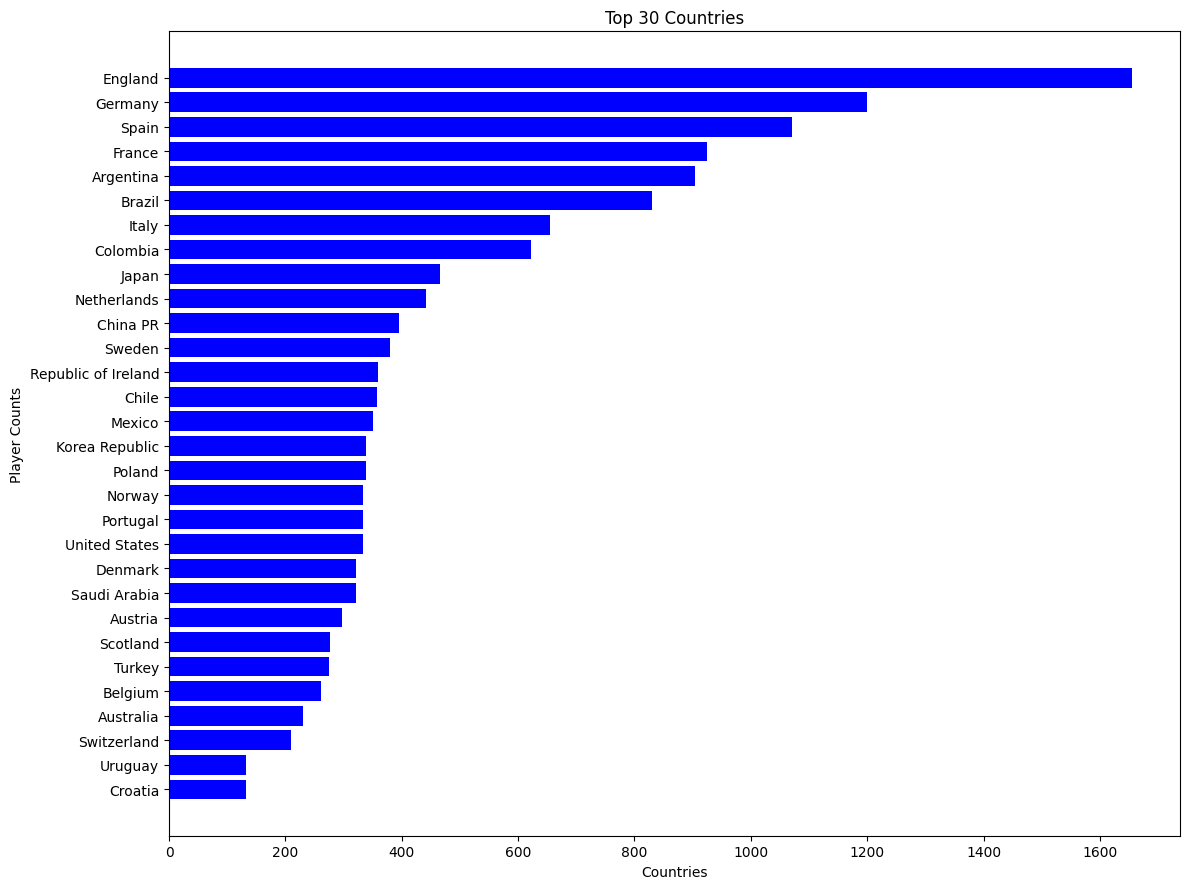

In [102]:
##oyun sayılarını görselleştirme
from matplotlib import pyplot as plt
plt.figure(figsize=(12,9))
top_30_country = country_player_grouped.head(30)
plt.barh(top_30_country['nationality'],top_30_country['Player Count'],color='Blue')
plt.xlabel('Countries')
plt.ylabel('Player Counts')
plt.title('Top 30 Countries')
plt.gca().invert_yaxis()  # En yüksek değeri en üstte göstermek için
plt.tight_layout()